In [1]:
## Import packages 

import numpy as np
from numpy import histogram as hist
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [3]:
# Read image gray
img_gray = rgb2gray(np.array(Image.open('obj1__0.png')))
img_gray

array([[49.4267, 46.9187, 24.9975, ..., 24.9975, 24.9975, 24.9975],
       [24.9975, 24.9975, 24.9975, ..., 24.9975, 24.9975, 24.9975],
       [24.9975, 24.9975, 24.9975, ..., 24.9975, 24.9975, 24.9975],
       ...,
       [24.9975, 24.9975, 24.9975, ..., 24.9975, 24.9975, 24.9975],
       [24.9975, 24.9975, 24.9975, ..., 24.9975, 24.9975, 24.9975],
       [24.9975, 24.9975, 24.9975, ..., 24.9975, 24.9975, 24.9975]])

In [4]:
#  compute histogram of image intensities, histogram should be normalized so that sum of all values equals 1
#  assume that image intensity varies between 0 and 255
#
#  img_gray - input image in grayscale format
#  num_bins - number of bins in the histogram

def normalized_hist(img_gray, num_bins):
    assert len(img_gray.shape) == 2, 'image dimension mismatch'
    assert img_gray.dtype == 'float', 'incorrect image type'

    img_gray2 = img_gray/img_gray.sum()
    ax = plt.hist(img_gray2.ravel(), num_bins)
    hists = plt.show()
    bins = print("Number of bins equal to: ", num_bins)

    return hists, bins

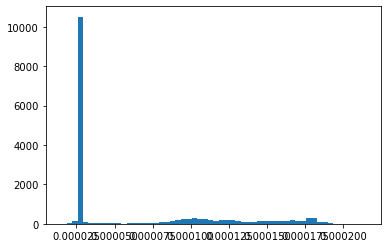

Number of bins equal to:  56


(None, None)

In [5]:
normalized_hist(img_gray, 56)